In [1]:
import os
from paths import *
from C_0L_allattnrep import *

In [2]:
eval_out_dir = os.path.join(model_save_, "eval-C_0L-0603232108")

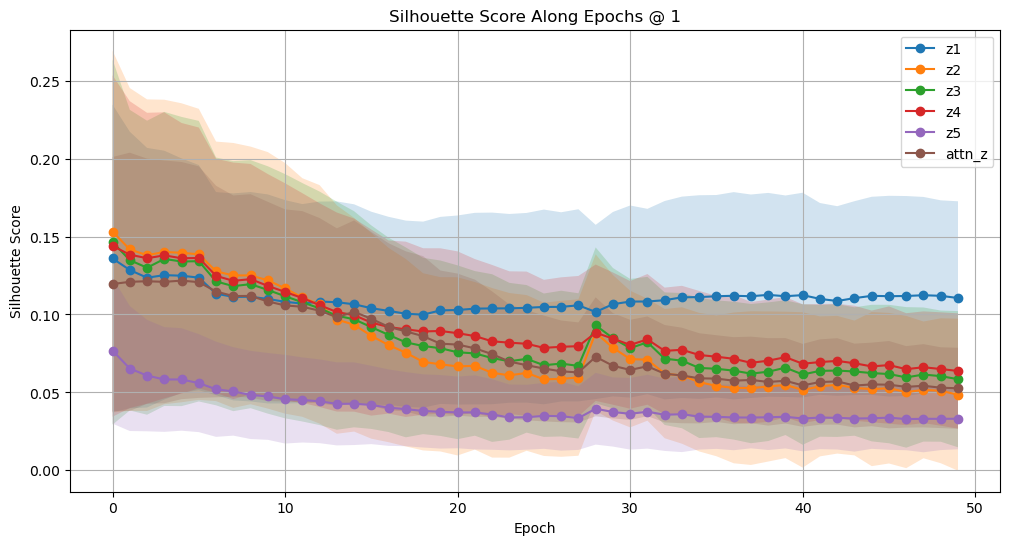

In [5]:
for model_type in ["recon100-5l"]: 
    for condition in ["u"]: 
        for model_num in [1]: 
            score_dict = {}
            for z_type in ["z1", "z2", "z3", "z4", "z5", "attn_z"]: 
                res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
                score_this = []
                for epoch in range(0, 50): 
                    sil_score_path = os.path.join(res_save_dir, f"{z_type}_sil_scores_{epoch}.pk")
                    with open(sil_score_path, "rb") as file: 
                        sil_scores = pickle.load(file)
                    score_this.append(sil_scores)
                score_dict[z_type] = score_this

            # Create the plot
            plt.figure(figsize=(12, 6))

            for z_type, data in score_dict.items(): 
                data = np.array(data)
                # Calculate the mean and standard deviation for each item
                means = np.mean(data, axis=1)
                std_devs = np.std(data, axis=1)
                plt.plot(means, marker='o', linestyle='-', label=z_type)
                plt.fill_between(range(len(means)), means - std_devs, means + std_devs, alpha=0.2)

            # Add title and labels
            plt.title(f'Silhouette Score Along Epochs @ {model_num}')
            plt.xlabel('Epoch')
            plt.ylabel('Silhouette Score')
            plt.legend()
            # Show the graph
            plt.grid(True)
            plt.show()

# ABX error. 

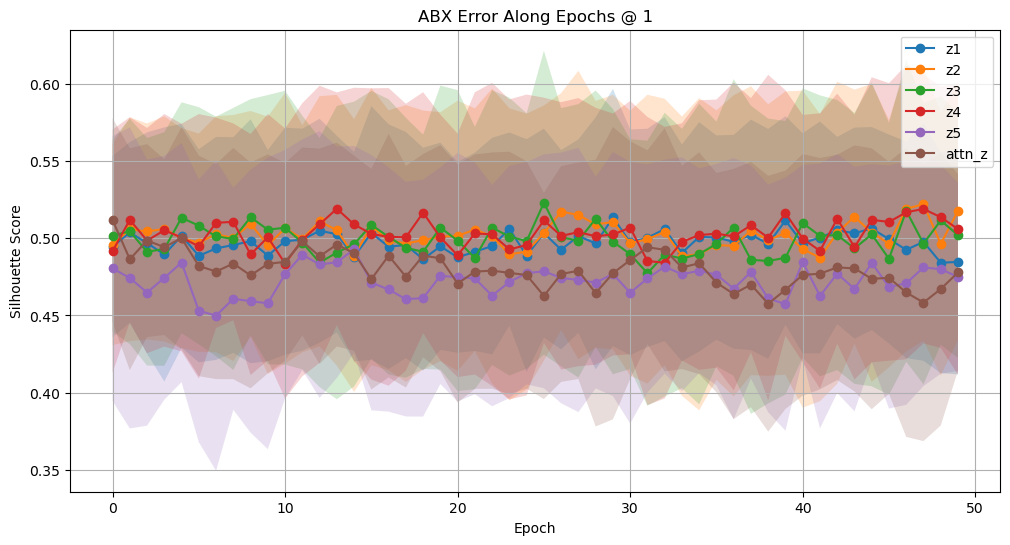

In [6]:
for model_type in ["recon100-5l"]: 
    for condition in ["u"]: 
        for model_num in [1]: 
            score_dict = {}
            for z_type in ["z1", "z2", "z3", "z4", "z5", "attn_z"]: 
                res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
                score_this = []
                for epoch in range(0, 50): 
                    sil_score_path = os.path.join(res_save_dir, f"{z_type}_abx_errs_{epoch}.pk")
                    with open(sil_score_path, "rb") as file: 
                        sil_scores = pickle.load(file)
                    score_this.append(sil_scores)
                score_dict[z_type] = score_this

            # Create the plot
            plt.figure(figsize=(12, 6))

            for z_type, data in score_dict.items(): 
                data = np.array(data)
                # Calculate the mean and standard deviation for each item
                means = np.mean(data, axis=1)
                std_devs = np.std(data, axis=1)
                plt.plot(means, marker='o', linestyle='-', label=z_type)
                plt.fill_between(range(len(means)), means - std_devs, means + std_devs, alpha=0.2)

            # Add title and labels
            plt.title(f'ABX Error Along Epochs @ {model_num}')
            plt.xlabel('Epoch')
            plt.ylabel('Silhouette Score')
            plt.legend()
            # Show the graph
            plt.grid(True)
            plt.show()